In [ ]:
# prompt: import pandas and this dataset from huggingface: https://huggingface.co/datasets/scikit-learn/auto-mpg

!pip install datasets
from datasets import load_dataset
import pandas as pd

dataset = load_dataset("scikit-learn/auto-mpg")
df = pd.DataFrame(dataset['train'])
print(df.head())


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [ ]:
# prompt: show me info about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
# prompt: delete car name and origin column

del df['car name']
del df['origin']
print(df.head())
df.info()

    mpg  cylinders  displacement horsepower  weight  acceleration  model year
0  18.0          8         307.0        130    3504          12.0          70
1  15.0          8         350.0        165    3693          11.5          70
2  18.0          8         318.0        150    3436          11.0          70
3  16.0          8         304.0        150    3433          12.0          70
4  17.0          8         302.0        140    3449          10.5          70
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
dtypes: float64(3), int64(3), object(1)
m

In [ ]:
# prompt: convert all data to float datatype

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


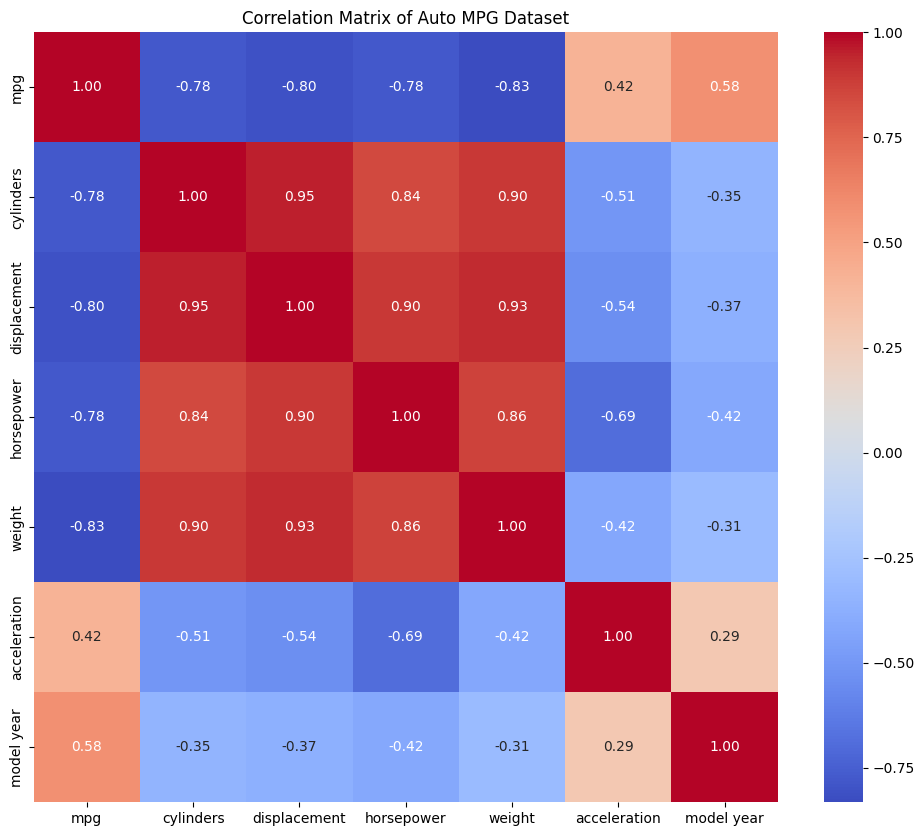

In [ ]:
# prompt: create a correlation matrix of the dataset

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Auto MPG Dataset')
plt.show()

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
# prompt: separate the dataset into training and test data

from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
X = df.drop('mpg', axis=1)  # Features (all columns except 'mpg')
y = df['mpg']  # Target variable ('mpg')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (318, 6)
y_train shape: (318,)
X_test shape: (80, 6)
y_test shape: (80,)


In [ ]:
# prompt: exclude missing data from the dataset then create a linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows with missing values
df.dropna(inplace=True)

# Assuming 'df' is your DataFrame
X = df.drop('mpg', axis=1)  # Features (all columns except 'mpg')
y = df['mpg']  # Target variable ('mpg')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 10.502370329417325
R-squared: 0.7942349075428586


     Actual  Predicted
79     26.0  25.932796
276    21.6  26.299279
248    36.1  32.965489
56     26.0  26.854430
393    27.0  29.453726
205    28.0  29.086995
43     13.0   7.638748
235    26.0  29.237044
152    19.0  20.877360
117    29.0  28.915829
9      15.0  12.485037
210    19.0  23.698983
289    16.9  16.418892
167    29.0  28.196688
277    16.2  22.039679
367    28.0  30.881524
125    20.0  21.183111
356    32.4  31.646623
296    27.4  27.916498
335    35.0  29.781482
     Actual  Predicted  Difference
79     26.0  25.932796    0.067204
276    21.6  26.299279   -4.699279
248    36.1  32.965489    3.134511
56     26.0  26.854430   -0.854430
393    27.0  29.453726   -2.453726
205    28.0  29.086995   -1.086995
43     13.0   7.638748    5.361252
235    26.0  29.237044   -3.237044
152    19.0  20.877360   -1.877360
117    29.0  28.915829    0.084171
9      15.0  12.485037    2.514963
210    19.0  23.698983   -4.698983
289    16.9  16.418892    0.481108
167    29.0  28.196688    0

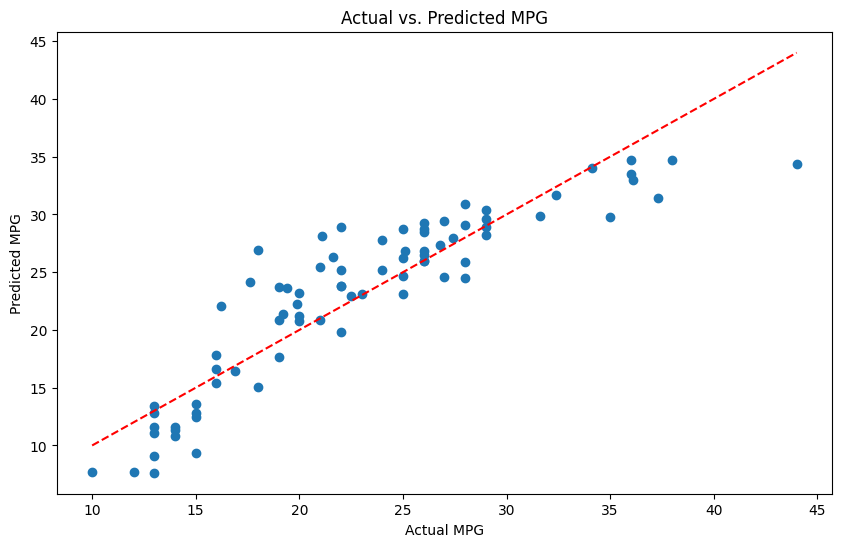

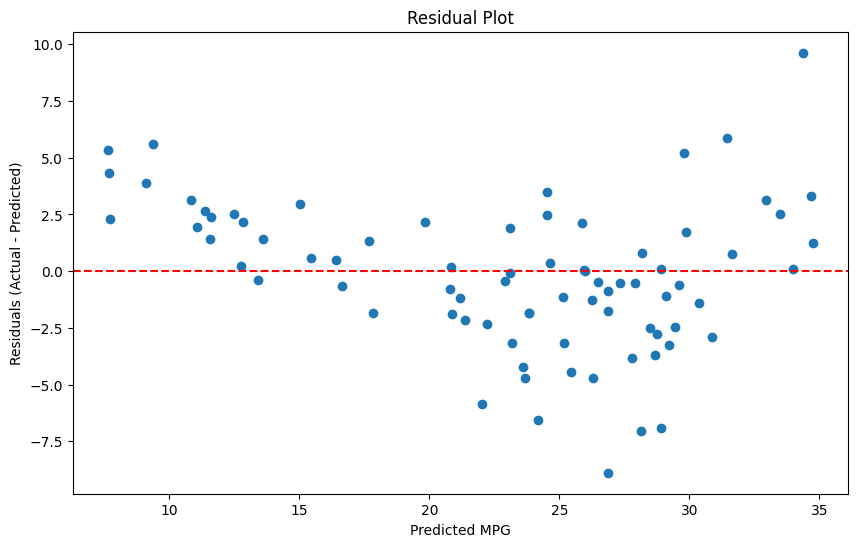

In [ ]:
# prompt: create a simple example where you show the difference between the predicted and the real values

# ... (Your existing code)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the first few rows of the comparison DataFrame
print(comparison_df.head(20))

# Calculate the difference between actual and predicted values
comparison_df['Difference'] = comparison_df['Actual'] - comparison_df['Predicted']

# Display the updated DataFrame with the difference column
print(comparison_df.head(20))

#Plot the difference
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs. Predicted MPG')
plt.show()

# Plot the residuals (differences between actual and predicted)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, comparison_df['Difference'])
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Predicted MPG')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()

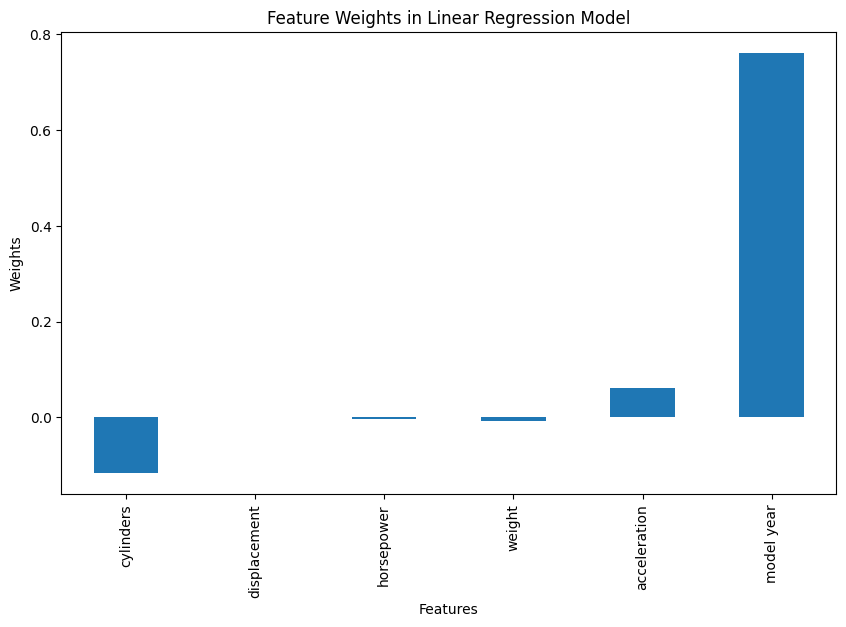

In [ ]:
# prompt: visualize the weights of the linear regression model

import matplotlib.pyplot as plt

# Get feature weights (coefficients) from the trained model
feature_weights = pd.Series(model.coef_, index=X.columns)

# Plot the feature weights
plt.figure(figsize=(10, 6))
feature_weights.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Feature Weights in Linear Regression Model')
plt.show()

In [ ]:
# prompt: try to make the prediction better

# ... (Your existing code)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Try polynomial regression
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression()) #degree 2
poly_model.fit(X_train, y_train)
y_poly_pred = poly_model.predict(X_test)

mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

print(f"Polynomial Regression - Mean Squared Error: {mse_poly}")
print(f"Polynomial Regression - R-squared: {r2_poly}")

# Compare with original Linear Regression
print(f"Linear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - R-squared: {r2}")

# ... (rest of your existing code, plotting etc.)

Polynomial Regression - Mean Squared Error: 7.0705240702947885
Polynomial Regression - R-squared: 0.8614725063570133
Linear Regression - Mean Squared Error: 10.502370329417325
Linear Regression - R-squared: 0.7942349075428586


     Actual  Predicted
79     26.0  26.520838
276    21.6  21.751928
248    36.1  34.544822
56     26.0  26.362115
393    27.0  30.115101
205    28.0  29.305105
43     13.0  13.129743
235    26.0  29.475287
152    19.0  19.349260
117    29.0  31.819244
9      15.0  16.586001
210    19.0  22.134139
289    16.9  15.941869
167    29.0  28.530773
277    16.2  18.695331
367    28.0  31.570395
125    20.0  19.791977
356    32.4  33.265742
296    27.4  28.307020
335    35.0  29.240084
     Actual  Predicted  Difference
79     26.0  26.520838   -0.520838
276    21.6  21.751928   -0.151928
248    36.1  34.544822    1.555178
56     26.0  26.362115   -0.362115
393    27.0  30.115101   -3.115101
205    28.0  29.305105   -1.305105
43     13.0  13.129743   -0.129743
235    26.0  29.475287   -3.475287
152    19.0  19.349260   -0.349260
117    29.0  31.819244   -2.819244
9      15.0  16.586001   -1.586001
210    19.0  22.134139   -3.134139
289    16.9  15.941869    0.958131
167    29.0  28.530773    0

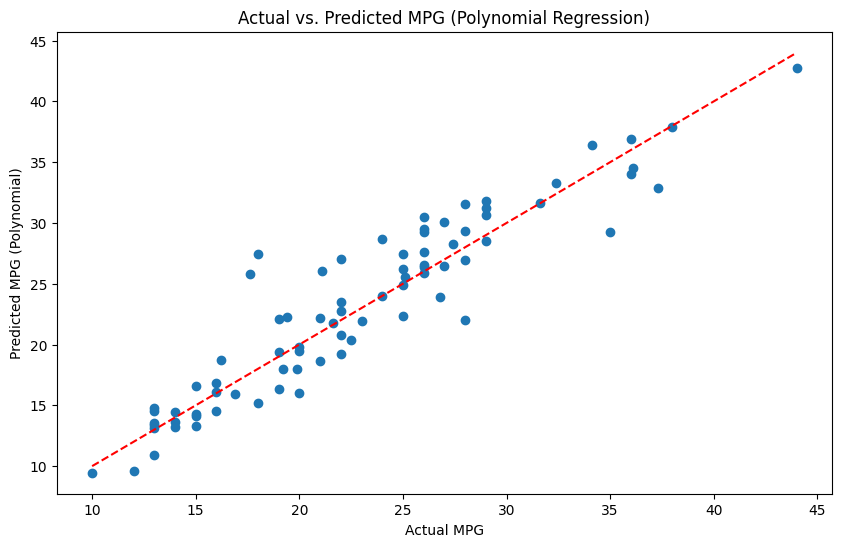

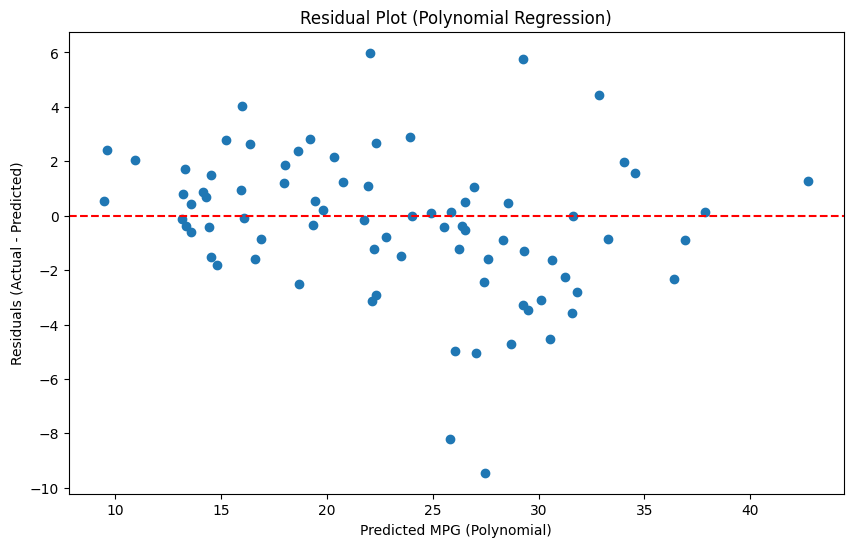

In [ ]:
# prompt: create a simple example where you show the difference between the predicted and the real values for the polynomial regression

# Create a DataFrame to compare actual and predicted values for polynomial regression
poly_comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_poly_pred})

# Display the first few rows of the comparison DataFrame
print(poly_comparison_df.head(20))

# Calculate the difference between actual and predicted values
poly_comparison_df['Difference'] = poly_comparison_df['Actual'] - poly_comparison_df['Predicted']

# Display the updated DataFrame with the difference column
print(poly_comparison_df.head(20))

# Plot the difference for polynomial regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_poly_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG (Polynomial)')
plt.title('Actual vs. Predicted MPG (Polynomial Regression)')
plt.show()

# Plot the residuals (differences between actual and predicted) for polynomial regression
plt.figure(figsize=(10, 6))
plt.scatter(y_poly_pred, poly_comparison_df['Difference'])
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted MPG (Polynomial)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Polynomial Regression)')
plt.show()

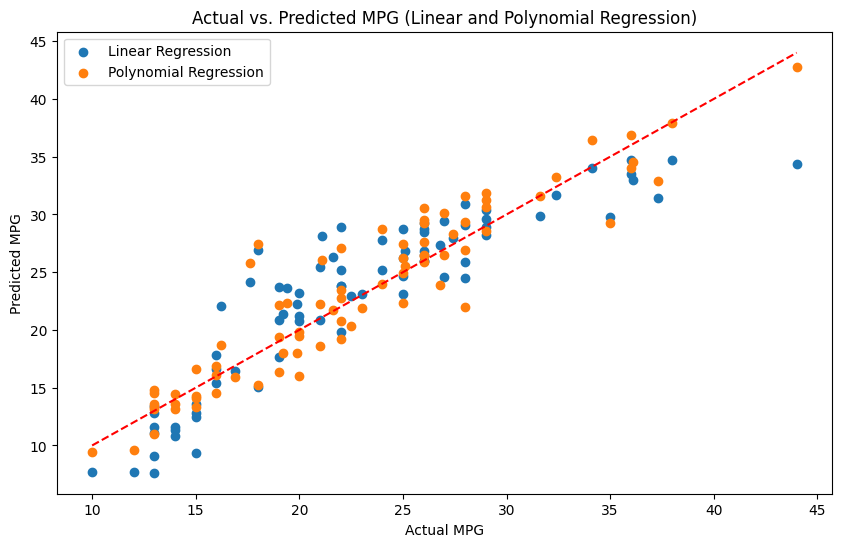

In [ ]:
# prompt: show the linear regression plot and the polynomial regression plot on one plot

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.scatter(y_test, y_poly_pred, label='Polynomial Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs. Predicted MPG (Linear and Polynomial Regression)')
plt.legend()
plt.show()

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Regression - Mean Squared Error: 6.037425564634708
Random Forest Regression - R-squared: 0.8817132332469282
     Actual  Predicted
79     26.0  26.083946
276    21.6  22.574535
248    36.1  34.182645
56     26.0  30.626541
393    27.0  27.243466
205    28.0  27.582454
43     13.0  12.762790
235    26.0  27.880541
152    19.0  19.551904
117    29.0  31.554300
9      15.0  14.017527
210    19.0  20.223361
289    16.9  15.636424
167    29.0  26.741176
277    16.2  19.058488
367    28.0  29.981874
125    20.0  20.142955
356    32.4  32.943281
296    27.4  29.182024
335    35.0  31.631729
     Actual  Predicted  Difference
79     26.0  26.083946   -0.083946
276    21.6  22.574535   -0.974535
248    36.1  34.182645    1.917355
56     26.0  30.626541   -4.626541
393    27.0  27.243466   -0.243466
205    28.0  27.582454    0.417546
43     13.0  12.762790    0.237210
235    26.0  27.880541   -1.

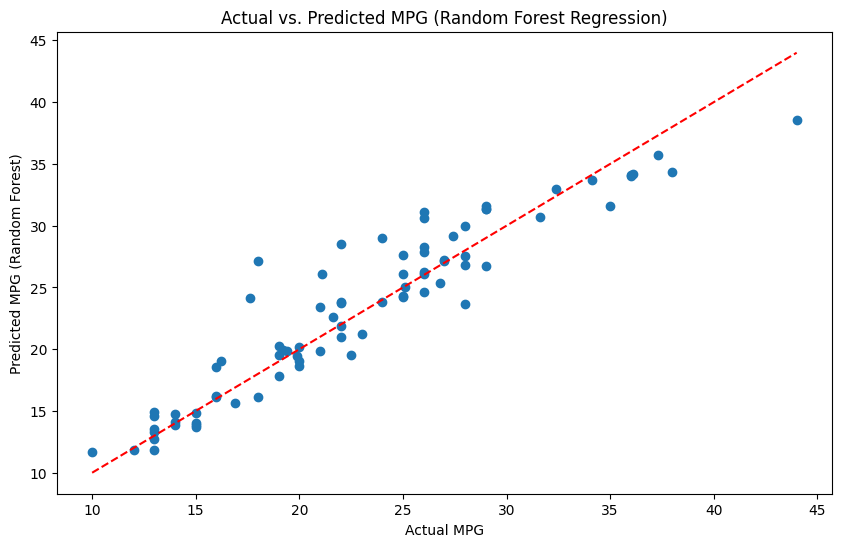

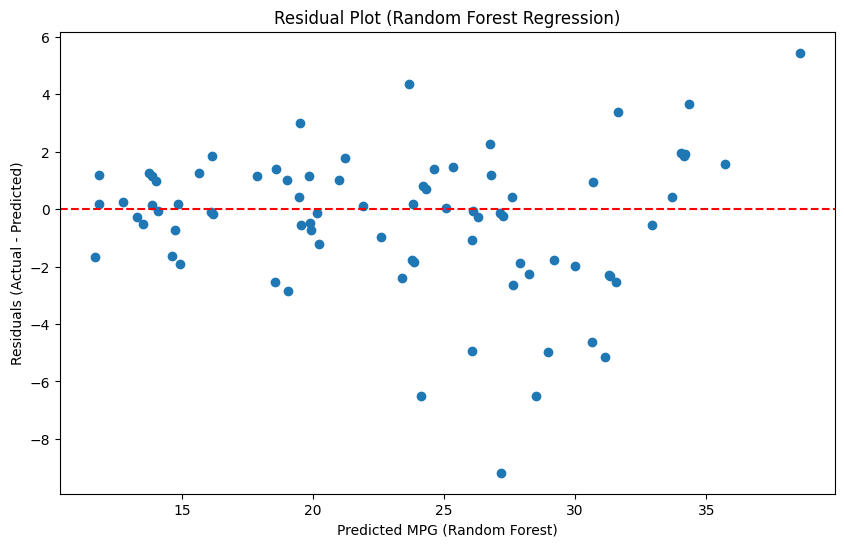

In [ ]:
# prompt: make the prediction better

# ... (Your existing code)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try Random Forest Regressor with hyperparameter tuning
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10] # Minimum number of samples required to split an internal node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_rf_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions using the best model
y_rf_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

print(f"Random Forest Regression - Mean Squared Error: {mse_rf}")
print(f"Random Forest Regression - R-squared: {r2_rf}")

# Create a DataFrame to compare actual and predicted values for random forest regression
rf_comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_rf_pred})

# Display the first few rows of the comparison DataFrame
print(rf_comparison_df.head(20))

# Calculate the difference between actual and predicted values
rf_comparison_df['Difference'] = rf_comparison_df['Actual'] - rf_comparison_df['Predicted']

# Display the updated DataFrame with the difference column
print(rf_comparison_df.head(20))


# Plot the difference for random forest regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_rf_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG (Random Forest)')
plt.title('Actual vs. Predicted MPG (Random Forest Regression)')
plt.show()

# Plot the residuals (differences between actual and predicted) for random forest regression
plt.figure(figsize=(10, 6))
plt.scatter(y_rf_pred, rf_comparison_df['Difference'])
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted MPG (Random Forest)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Random Forest Regression)')
plt.show()

# ... (rest of your plotting code, comparing with other models)

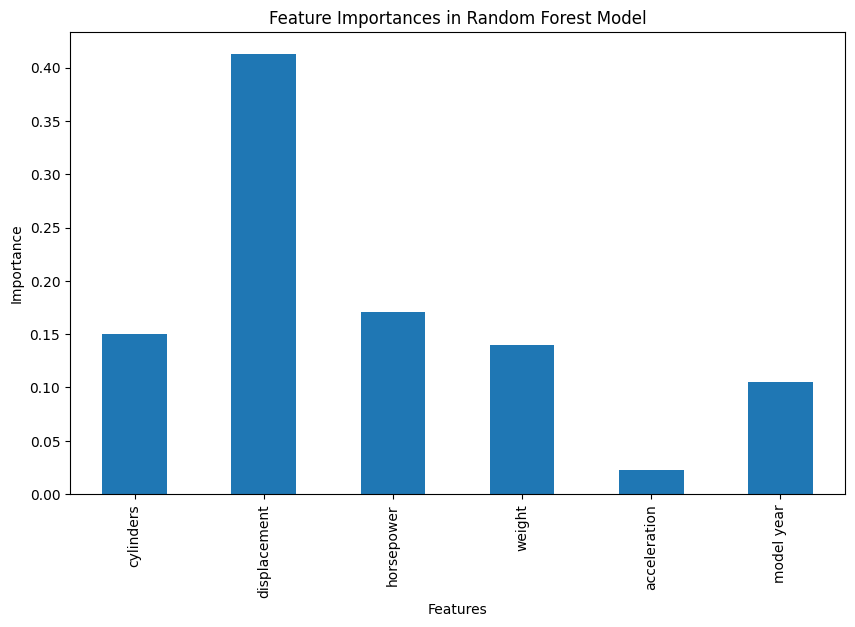

In [ ]:
# prompt: show the weights used in the random forest regression

import pandas as pd

# Get feature importances from the best Random Forest model
feature_importances = pd.Series(best_rf_model.feature_importances_, index=X.columns)

# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.show()

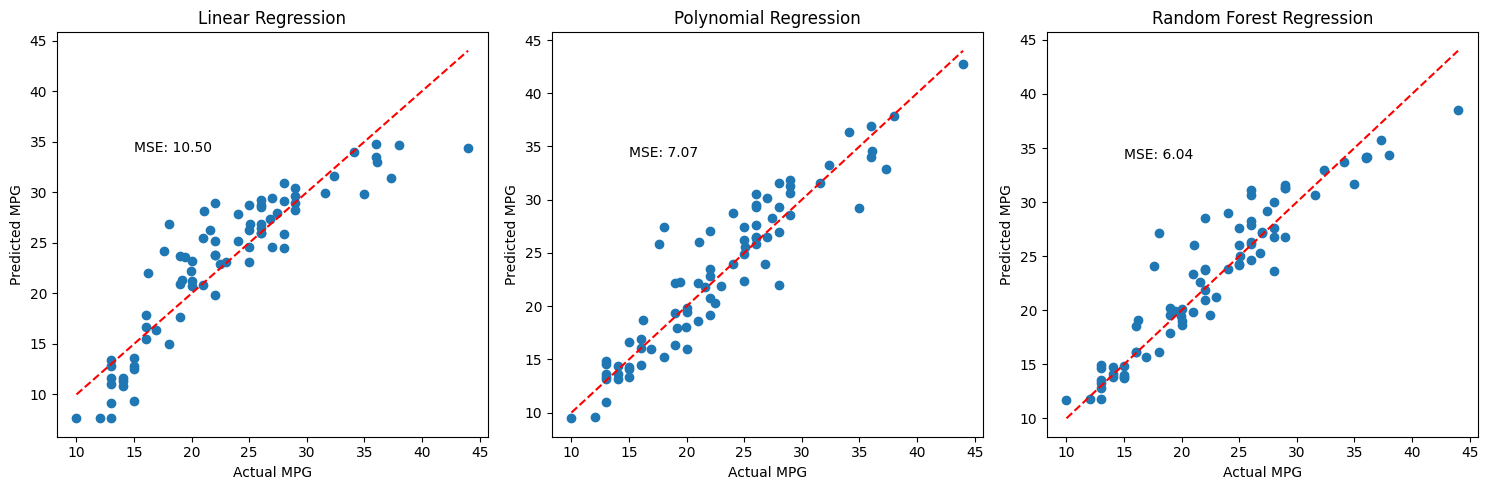

In [ ]:
# prompt: plot all three regressions next to each other and their mse

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.text(min(y_test) + 5, max(y_test) -10, f"MSE: {mse:.2f}")


plt.subplot(1, 3, 2)
plt.scatter(y_test, y_poly_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Polynomial Regression')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.text(min(y_test) + 5, max(y_test) - 10, f"MSE: {mse_poly:.2f}")


plt.subplot(1, 3, 3)
plt.scatter(y_test, y_rf_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest Regression')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.text(min(y_test) + 5, max(y_test) - 10, f"MSE: {mse_rf:.2f}")

plt.tight_layout()
plt.show()

In [ ]:
# prompt: give me a conclusion about this project

This project investigated the prediction of automobile fuel efficiency (MPG) using various regression models.  The analysis began with data preprocessing,
including handling missing values and removing irrelevant columns from the "auto-mpg" dataset.  Exploratory data analysis, visualized through a correlation
heatmap, provided insights into feature relationships.

Three regression models were trained and evaluated: Linear Regression, Polynomial Regression (degree 2), and Random Forest Regression.  Model performance
was assessed using Mean Squared Error (MSE) and R-squared.  Visualizations, including actual vs. predicted MPG plots and residual plots, helped analyze the
models accuracy and identify potential areas of improvement.  Furthermore, feature importance was analyzed for the Random Forest model.
A comparative plot was created to easily compare the performances of the three models.  The results show that the Random Forest Regression model, after
hyperparameter tuning, achieved the best performance based on the lowest MSE.
